In [1]:
%autosave 0
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Autosave disabled


In [2]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Find my mysqlConnector script
sys.path.append('..')

from lib.SqlCo import Sqldd

Using TensorFlow backend.


Local Sec Env loaded


Objectif du Notebook : Comprendre nos datas et avoir une idée des performances à atteindre avec une librairie d'Auto-Ml

# Init 

In [3]:
modelise_time = False
call_from_bdd = False
pd.set_option('display.max_columns', 500)

In [4]:
%%time
if call_from_bdd:
    my_bdd = Sqldd()
    cnx, cursor = my_bdd.get_bdd_co()
    df = pd.read_sql('SELECT * FROM app_hover_public', con=cnx)
    cnx.close()
    cursor.close()
else:
    df = pd.read_csv('../Data/app_hover_public.csv', )

Wall time: 612 ms


In [5]:
df.sample(3)

Steam_id                               Title Date_release Evaluation  \
53937   1173210    Horror Legends - Supporter Skins   2019-10-18         No   
9569     392440     Official Guide - Vagrant Hearts   2016-02-26         No   
22327    610970  TANE DLC: US ATC Class S 160 Steam   2017-03-22         No   

       Nb_Eval  Nb_game_tags  Game_Tag_1 Game_Tag_2 Game_Tag_3 Game_Tag_4  \
53937        0             2      Action      Indie        NaN        NaN   
9569         0             4   Adventure        RPG      Indie     Casual   
22327        0             1  Simulation        NaN        NaN        NaN   

      Game_Tag_5               App_cat         Dev_team   Publisher_team  \
53937        NaN  Downloadable Content    October Games    October Games   
9569         NaN  Downloadable Content  Warfare Studios  Warfare Studios   
22327        NaN  Downloadable Content        N3V Games        N3V Games   

       Os_supported Prymary_genre  Controller_support  Is_free_app  \
53937             1         Indie                   0            0   
9569              1     Adventure                   1            0   
22327             4    Simulation                   0            0   

       Nb_language  Workshop_visible  Only_vr_support  Vr_support  \
53937            2                 0                0           0   
9569             1                 0                0           0   
22327            4                 0                0           0   

       Has_adult_content  Nb_achievements  Single_player  Coop_player  \
53937                  1                0              0            0   
9569                   0                0              1            0   
22327                  0                0              1            0   

       Multi_player  Early_Access  Price  
53937             1             0   0.00  
9569              0             0   0.99  
22327             1             0  13.99

In [6]:
df.columns

Index(['Steam_id', 'Title', 'Date_release', 'Evaluation', 'Nb_Eval',
       'Nb_game_tags', 'Game_Tag_1', 'Game_Tag_2', 'Game_Tag_3', 'Game_Tag_4',
       'Game_Tag_5', 'App_cat', 'Dev_team', 'Publisher_team', 'Os_supported',
       'Prymary_genre', 'Controller_support', 'Is_free_app', 'Nb_language',
       'Workshop_visible', 'Only_vr_support', 'Vr_support',
       'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
       'Multi_player', 'Early_Access', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59472 entries, 0 to 59471
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Steam_id            59472 non-null  int64  
 1   Title               59469 non-null  object 
 2   Date_release        59472 non-null  object 
 3   Evaluation          59472 non-null  object 
 4   Nb_Eval             59472 non-null  int64  
 5   Nb_game_tags        59472 non-null  int64  
 6   Game_Tag_1          59472 non-null  object 
 7   Game_Tag_2          55273 non-null  object 
 8   Game_Tag_3          47807 non-null  object 
 9   Game_Tag_4          38489 non-null  object 
 10  Game_Tag_5          31347 non-null  object 
 11  App_cat             59445 non-null  object 
 12  Dev_team            56931 non-null  object 
 13  Publisher_team      57492 non-null  object 
 14  Os_supported        59472 non-null  int64  
 15  Prymary_genre       58419 non-null  object 
 16  Cont

In [8]:
## Helper for viz one product
checkid = df[df['Steam_id'].isin([426630])]
checkid

Steam_id          Title Date_release       Evaluation  Nb_Eval  \
11393    426630  Bubsy Two-Fur   2015-12-17  Mostly Positive      250   

       Nb_game_tags Game_Tag_1 Game_Tag_2  Game_Tag_3 Game_Tag_4 Game_Tag_5  \
11393            16     Action  Adventure  Platformer      Retro    Classic   

      App_cat  Dev_team Publisher_team  Os_supported Prymary_genre  \
11393    Game  Accolade       Retroism             1     Adventure   

       Controller_support  Is_free_app  Nb_language  Workshop_visible  \
11393                   1            0            3                 0   

       Only_vr_support  Vr_support  Has_adult_content  Nb_achievements  \
11393                0           0                  0                0   

       Single_player  Coop_player  Multi_player  Early_Access  Price  
11393              1            0             1             0   4.99

# Output Visualisation

- Output pour la phase 1 :

In [9]:
def apply_status_reco(df):
    if df['Nb_Eval'] >= 1:
        return 1
    else:
        return 0

<AxesSubplot:xlabel='status_reco', ylabel='count'>

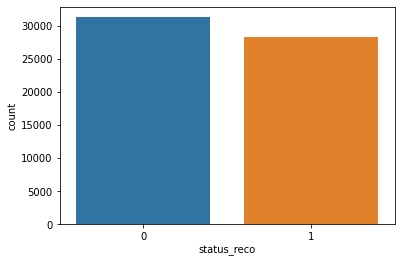

In [10]:
df['status_reco'] = df.apply(apply_status_reco, axis=1)
sns.countplot(df['status_reco'])

- Output pour la phase 2 :

In [11]:
df['Evaluation'].unique()

array(['Overwhelmingly Positive', 'Very Positive', 'Mostly Positive',
       'No', 'Mixed', 'Very Negative', 'Positive', 'Mostly Negative',
       'Negative', 'Overwhelmingly Negative'], dtype=object)

In [12]:
positive = [x for x in df['Evaluation'] if 'Positive' in x]
moyenne = [x for x in df['Evaluation'] if 'Mixed' in x]
negative = [x for x in df['Evaluation'] if 'Negative' in x]

print("Positives : ", len(positive))
print("Negative : ", len(negative))
print("Mixe : ", len(moyenne))

Positives :  19150
Negative :  1539
Mixe :  7525


In [13]:
def apply_value_reco(df):
    if 'Positive' in df['Evaluation']:
        return 1
    else:
        return 0    

<AxesSubplot:xlabel='Value_reco', ylabel='count'>

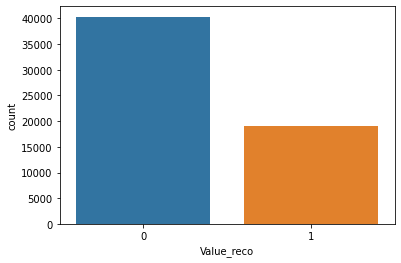

In [14]:
df['Value_reco'] = df.apply(apply_value_reco, axis=1)
sns.countplot(df['Value_reco'])

In [15]:
## Most review
top_20 = df.sort_values("Nb_Eval", axis = 0, ascending = False).head(20)
top_20

Steam_id                             Title Date_release  \
25          730  Counter-Strike: Global Offensive   2012-08-21   
22          570                            Dota 2   2013-07-09   
20275    578080     PLAYERUNKNOWN'S BATTLEGROUNDS   2017-12-21   
3458     271590                Grand Theft Auto V   2015-04-13   
19          440                   Team Fortress 2   2007-10-10   
7592     359550   Tom Clancy's Rainbow Six® Siege   2015-12-01   
146        4000                       Garry's Mod   2006-11-29   
1432     105600                          Terraria   2011-05-16   
4678     304930                          Unturned   2017-07-07   
2239     230410                          Warframe   2013-03-25   
4116     292030         The Witcher® 3: Wild Hunt   2015-05-18   
2802     252490                              Rust   2018-02-08   
2819     252950                    Rocket League®   2015-07-07   
12353    444090                         Paladins®   2018-05-08   
6789     346110             ARK: Survival Evolved   2017-08-27   
1969     218620                          PAYDAY 2   2013-08-13   
49349   1085660                         Destiny 2   2019-10-01   
8887     381210                  Dead by Daylight   2016-06-14   
21          550                     Left 4 Dead 2   2009-11-16   
2176     227300            Euro Truck Simulator 2   2012-10-12   

                    Evaluation  Nb_Eval  Nb_game_tags  \
25               Very Positive  4477929            20   
22               Very Positive  1315136            20   
20275                    Mixed  1239743            20   
3458             Very Positive   783861            20   
19               Very Positive   675374            20   
7592             Very Positive   575718            20   
146    Overwhelmingly Positive   472614            20   
1432   Overwhelmingly Positive   420598            20   
4678             Very Positive   387980            20   
2239             Very Positive   360720            20   
4116   Overwhelmingly Positive   349665            20   
2802             Very Positive   343588            20   
2819             Very Positive   309849            20   
12353            Very Positive   270275            20   
6789           Mostly Positive   268555            20   
1969             Very Positive   264288            20   
49349            Very Positive   244885            20   
8887             Very Positive   232868            20   
21     Overwhelmingly Positive   232643            20   
2176   Overwhelmingly Positive   230534            20   

                      Game_Tag_1       Game_Tag_2      Game_Tag_3  \
25                           FPS          Shooter     Multiplayer   
22                  Free to Play             MOBA     Multiplayer   
20275                   Survival          Shooter     Multiplayer   
3458                   Open Worl           Action     Multiplayer   
19                  Free to Play     Hero Shooter     Multiplayer   
7592                         FPS     Hero Shooter     Multiplayer   
146                      Sandbox      Multiplayer           Funny   
1432   Open World Survival Craft          Sandbox        Survival   
4678                Free to Play         Survival         Zombies   
2239                Free to Play   Looter Shooter          Action   
4116                   Open Worl              RPG      Story Rich   
2802                    Survival         Crafting     Multiplayer   
2819                 Multiplayer           Soccer     Competitive   
12353               Hero Shooter     Free to Play     Multiplayer   
6789   Open World Survival Craft         Survival       Open Worl   
1969                       Co-op           Action             FPS   
49349               Free to Play   Looter Shooter             FPS   
8887                      Horror  Survival Horror     Multiplayer   
21                       Zombies            Co-op             FPS   
2176                  Simulation          

In [16]:
## Most bad review
worst = df[df['Evaluation'].isin(['Very Negative', 'Mostly Negative','Negative', 'Overwhelmingly Negative'])]
worst_20 = worst.sort_values("Nb_Eval", axis = 0, ascending = False).head(20)
worst_20

Steam_id                                       Title Date_release  \
20258    577800                                    NBA 2K18   2017-09-14   
26597    681660                                Bless Online   2018-10-23   
29450    730310                          DYNASTY WARRIORS 9   2018-02-13   
22838    619080                                         SOS   2018-01-23   
2388     236510                         Takedown: Red Sabre   2014-02-10   
2603     246090                              Spacebase DF-9   2014-10-27   
3771     282560                 RollerCoaster Tycoon World™   2016-11-16   
2961     258180                           Deus Ex: The Fall   2014-03-17   
3110     261980                           Half-Life: Before   2013-12-03   
1100      47700      Command & Conquer 4: Tiberian Twilight   2010-03-17   
10214    404090                       Fallout 4 Season Pass   2016-03-21   
1093      47400                           Stronghold 3 Gold   2012-05-25   
2017     221020                                       Towns   2012-11-07   
6671     344040                                   Voxelized   2017-04-05   
1551     201510              Flatout 3: Chaos & Destruction   2011-12-13   
37770    874310  Total War: THREE KINGDOMS - Reign of Blood   2019-06-27   
10530    409510                              Genesis Online   2015-11-10   
2432     238240                               Edge of Space   2015-09-17   
2650     247950                                    Sacred 3   2014-07-31   
7179     352550                                Urban Empire   2017-01-20   

                    Evaluation  Nb_Eval  Nb_game_tags  \
20258          Mostly Negative    14515            15   
26597          Mostly Negative    10231            20   
29450          Mostly Negative     5075             9   
22838          Mostly Negative     4858            20   
2388           Mostly Negative     3377            20   
2603   Overwhelmingly Negative     3166            17   
3771           Mostly Negative     2808            14   
2961           Mostly Negative     2631            19   
3110           Mostly Negative     2440            20   
1100   Overwhelmingly Negative     2400             6   
10214          Mostly Negative     2336            20   
1093           Mostly Negative     2260            20   
2017           Mostly Negative     2210            19   
6671           Mostly Negative     2064            14   
1551   Overwhelmingly Negative     2022            19   
37770          Mostly Negative     1985             4   
10530          Mostly Negative     1940            20   
2432           Mostly Negative     1914            20   
2650           Mostly Negative     1894            20   
7179           Mostly Negative     1820            11   

                      Game_Tag_1             Game_Tag_2        Game_Tag_3  \
20258                     Sports             Basketball          Gambling   
26597                     MMORPG  Massively Multiplayer               RPG   
29450                     Action         Hack and Slash         Open Worl   
22838                   Survival                 Action       Multiplayer   
2388                         FPS                 Action          Tactical   
2603                  Simulation                  Space             Sci-f   
3771                  Simulation               Building        Management   
2961                   Cyberpunk                    RPG            Action   
3110                Free to Play                 Action         Adventure   
1100                    Strategy                    RTS       Multiplayer   
10214                  Open Worl                    RPG  Post-apocalyptic   
1093                    Strategy           City Builder          Medieval   
2017                City Builder                  Indie           Sandbox   
6671                Early Access                 Casual         Open Worl   
1551               Combat Racing         Automobile Sim  

In [17]:
## Most Mixed review
Mixed = df[df['Evaluation'].isin(['Mixed'])]
Mixed_20 = Mixed.sort_values("Nb_Eval", axis = 0, ascending = False).head(20)
Mixed_20

Steam_id                                              Title  \
20275    578080                      PLAYERUNKNOWN'S BATTLEGROUNDS   
11783    433850                                   Z1 Battle Royale   
2020     221100                                               DayZ   
3587     275850                                       No Man's Sky   
2191     227940                                  Heroes & Generals   
4259     295110                                       Just Survive   
7974     365590                         Tom Clancy’s The Division™   
4099     291480                                            Warface   
371       12210          Grand Theft Auto IV: The Complete Edition   
11296    424370                            Wolcen: Lords of Mayhem   
4653     304390                                         FOR HONOR™   
3496     273110                       Counter-Strike Nexon: Studio   
9894     397900  Business Tour - Board Game with Online Multipl...   
1484     113400                                       APB Reloaded   
16106    513710                                               SCUM   
2845     253710                                  theHunter Classic   
18813    555570                             Infestation: The New Z   
35453    834910                                              ATLAS   
4594     302830                                        BLOCKADE 3D   
36019    844870                                           KurtzPel   

      Date_release Evaluation  Nb_Eval  Nb_game_tags    Game_Tag_1  \
20275   2017-12-21      Mixed  1239743            20      Survival   
11783   2018-02-28      Mixed   208703            20      Survival   
2020    2018-12-13      Mixed   195725            20      Survival   
3587    2016-08-12      Mixed   129266            20     Open Worl   
2191    2016-10-18      Mixed   119702            20  Free to Play   
4259    2015-01-15      Mixed    65879            20       Zombies   
7974    2016-03-07      Mixed    61943            20     Open Worl   
4099    2014-07-01      Mixed    57726            20  Free to Play   
371     2020-03-24      Mixed    53963            20     Open Worl   
11296   2020-02-13      Mixed    50594            20           RPG   
4653    2017-02-13      Mixed    45133            20      Medieval   
3496    2014-10-07      Mixed    37153            20  Free to Play   
9894    2017-07-27      Mixed    36300            20    Board Game   
1484    2011-12-06      Mixed    34267            20  Free to Play   
16106   2018-08-29      Mixed    32878            20      Survival   
2845    2014-06-03      Mixed    30924            20  Free to Play   
18813   2016-11-22      Mixed    30899            20       Zombies   
35453   2018-12-22      Mixed    30078            20      Survival   
4594    2014-12-19      Mixed    27803            20  Free to Play   
36019   2019-04-30      Mixed    27527            20         Anime   

                      Game_Tag_2               Game_Tag_3  \
20275                    Shooter              Multiplayer   
11783      Massively Multiplayer              Multiplayer   
2020                     Zombies              Multiplayer   
3587   Open World Survival Craft                    Space   
2191                World War II                      FPS   
4259                    Survival                Open Worl   
7974                 Multiplayer     Third-Person Shooter   
4099                         FPS              Multiplayer   
371                       Action                  Bowling   
11296             Hack and Slash               Action RPG   
4653                      Action                Swordplay   
3496                     Zombies              Multiplayer   
9894                Free to Play              Multiplayer   
1484                   Open Worl                   Action   
16106  Open World Survival Craft                Open Worl   
2845                     Hunting              Multiplayer   
18813               Free to 

- Output pour la phase 3 :

In [18]:
## This df will be used for create train/test on phase 2 & 3

df_n_phase = df[df["status_reco"].isin([1])]
df_n_phase.shape 

(28214, 31)

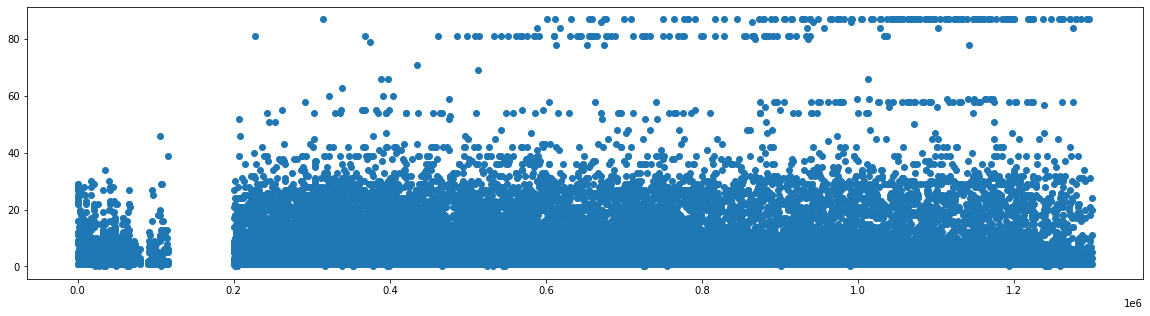

In [19]:
plt.figure(figsize=(20,5))
plt.scatter(df_n_phase["Steam_id"],df_n_phase["Nb_language"])

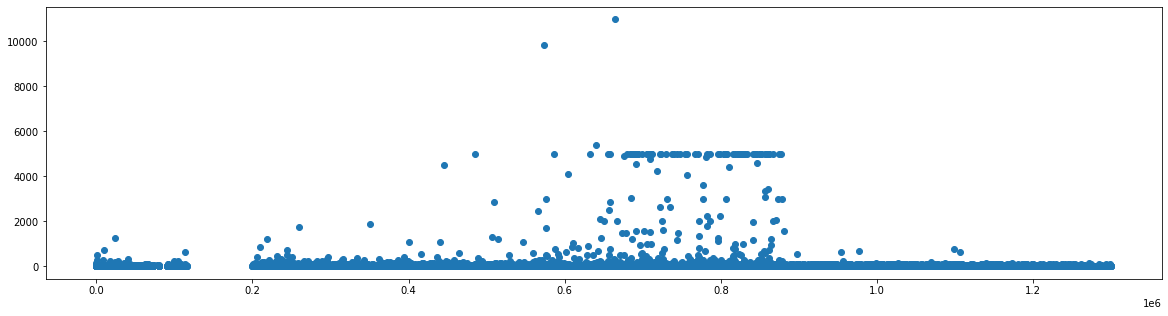

In [20]:
plt.figure(figsize=(20,5))
plt.scatter(df_n_phase["Steam_id"],df_n_phase["Nb_achievements"])

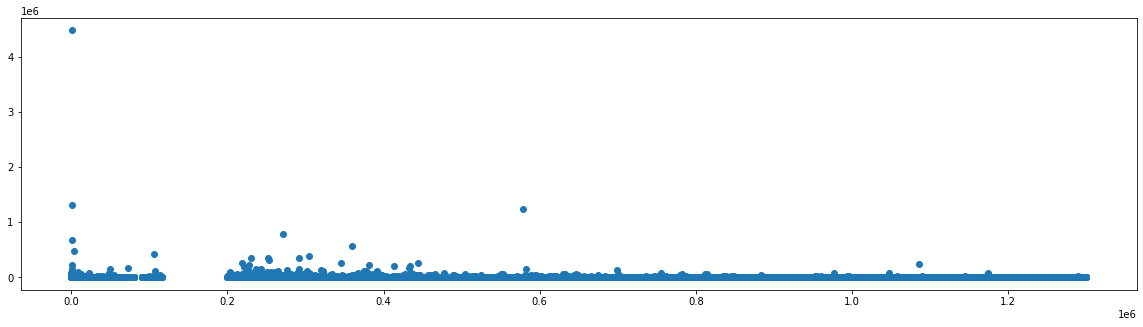

In [21]:
plt.figure(figsize=(20,5))
plt.scatter(df_n_phase["Steam_id"],df_n_phase["Nb_Eval"])

<AxesSubplot:xlabel='Steam_id', ylabel='Nb_Eval'>

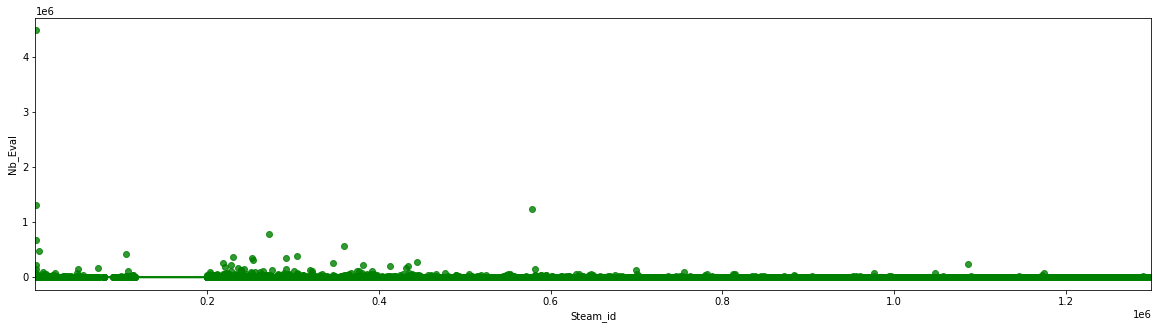

In [22]:
plt.figure(figsize=(20,5))
sns.regplot(df_n_phase["Steam_id"],df_n_phase["Nb_Eval"], color="g")

# Features Exploration

In [23]:
df.columns

Index(['Steam_id', 'Title', 'Date_release', 'Evaluation', 'Nb_Eval',
       'Nb_game_tags', 'Game_Tag_1', 'Game_Tag_2', 'Game_Tag_3', 'Game_Tag_4',
       'Game_Tag_5', 'App_cat', 'Dev_team', 'Publisher_team', 'Os_supported',
       'Prymary_genre', 'Controller_support', 'Is_free_app', 'Nb_language',
       'Workshop_visible', 'Only_vr_support', 'Vr_support',
       'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
       'Multi_player', 'Early_Access', 'Price', 'status_reco', 'Value_reco'],
      dtype='object')

In [24]:
df["App_cat"].unique()

array(['Game', 'Legacy Media', 'Application', 'Demo', 'Config', nan,
       'Downloadable Content', 'Tool', 'Music', 'Unknown', 'Video',
       'Series', 'Hardware'], dtype=object)

<AxesSubplot:>

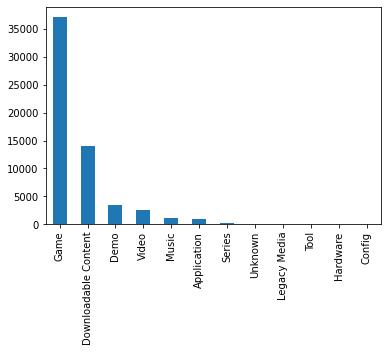

In [25]:
df.App_cat.value_counts().plot.bar()

In [26]:
df["Prymary_genre"].unique()

array(['Action', 'Free to Play', 'Strategy', 'Indie', 'RPG',
       'Video Production', 'Unknown Genre', 'Casual', 'Simulation',
       'Racing', 'Adventure', 'Sports', 'Massively Multiplayer', nan,
       'Animation & Modeling', 'Early Access', 'Utilities',
       'Audio Production', 'Design & Illustration', 'Photo Editing',
       'Violent', 'Web Publishing', 'Education', 'Game Development',
       'Software Training', 'Accounting', 'Nudity', 'Gore',
       'Sexual Content'], dtype=object)

<AxesSubplot:>

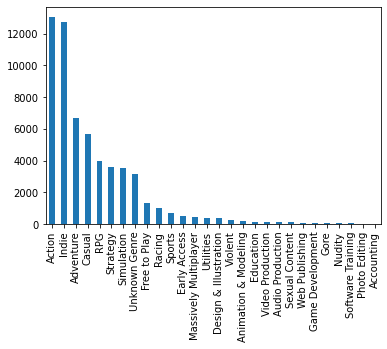

In [27]:
df.Prymary_genre.value_counts().plot.bar()

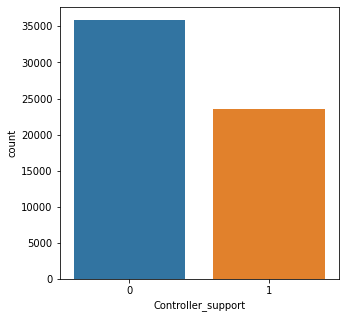

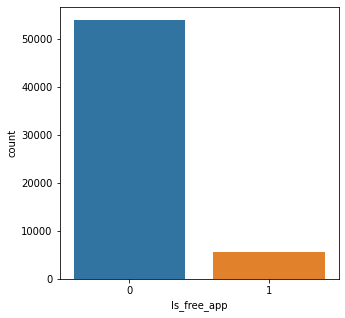

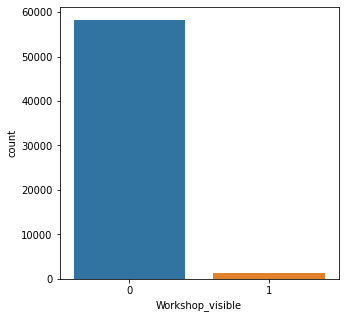

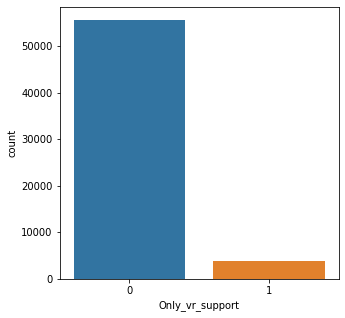

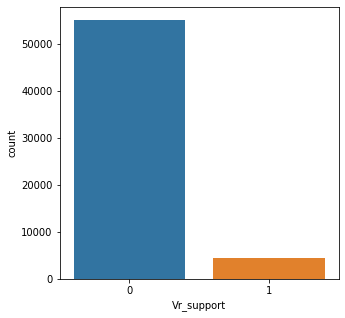

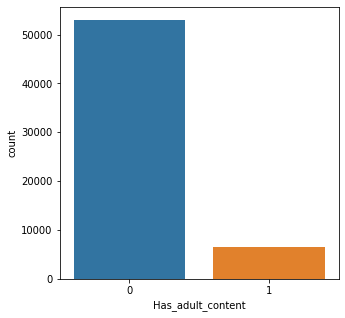

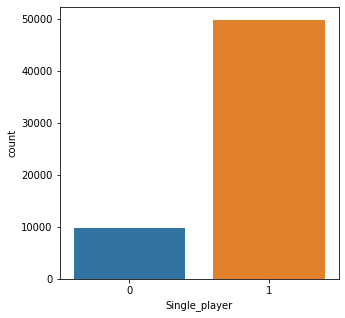

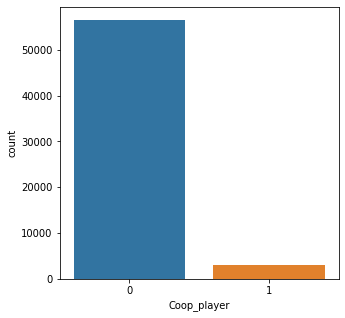

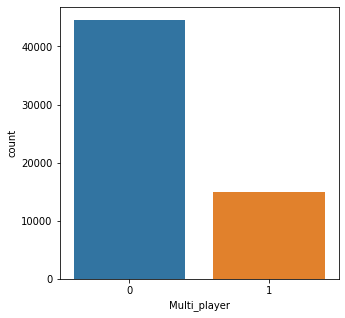

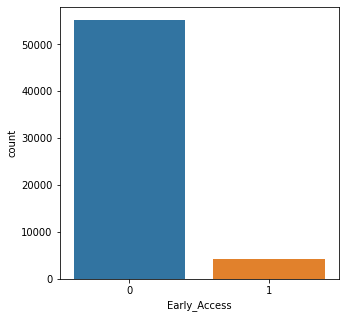

In [28]:
col_bool = ['Controller_support', 'Is_free_app',
       'Workshop_visible', 'Only_vr_support', 'Vr_support',
       'Has_adult_content', 'Single_player', 'Coop_player',
       'Multi_player','Early_Access']

for i in col_bool:
    plt.figure(figsize=(5,5))
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:xlabel='Os_supported', ylabel='count'>

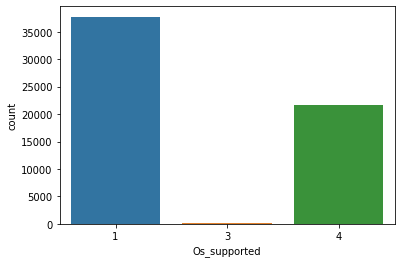

In [29]:
sns.countplot(df["Os_supported"])

<AxesSubplot:xlabel='Steam_id', ylabel='Price'>

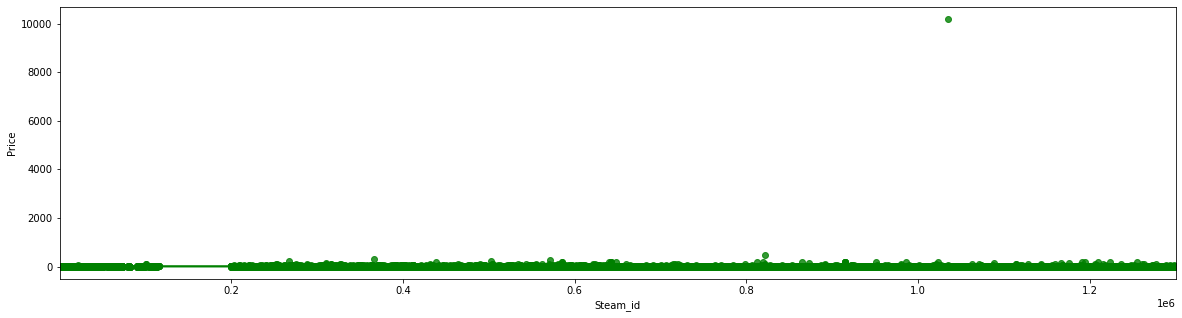

In [30]:
plt.figure(figsize=(20,5))
sns.regplot(df["Steam_id"],df["Price"], color="g")

In [31]:
df["Price"].describe()

count    59472.000000
mean         4.106713
std         42.568243
min          0.000000
25%          0.000000
50%          0.000000
75%          4.990000
max      10170.000000
Name: Price, dtype: float64

In [32]:
df.Dev_team.value_counts().head(20)

SmiteWorks USA, LLC               1442
KOEI TECMO GAMES CO, LTD           344
Choice of Games                    244
Ubisoft - San Francisco            178
N3V Games                          168
Lionsgate                          168
Milestone Srl                      133
Hosted Games                       127
Paradox Development Studio          96
Laush Dmitriy Sergeevich            94
Square Enix                         79
Nikita &quot;Ghost_RUS&quot;        77
Creobit                             68
INTI CREATES CO, LTD                68
Mia Blais-Côté                      66
SCS Software                        65
Stegalosaurus Game Development      64
Ubisoft Montreal                    64
Ripknot Systems                     63
Blender Games                       62
Name: Dev_team, dtype: int64

In [33]:
df.Publisher_team.value_counts().head(20)

SmiteWorks USA, LLC           1442
Degica                         440
KOEI TECMO GAMES CO, LTD       353
Big Fish Games                 344
Choice of Games                244
SEGA                           240
Lionsgate                      237
Square Enix                    221
Paradox Interactive            218
Ubisoft                        214
N3V Games                      188
Sekai Project                  184
THQ Nordic                     171
BANDAI NAMCO Entertainment     157
Slitherine Ltd                 155
Ubisoft - San Francisco        152
2K                             149
Strategy First                 148
Plug In Digital                138
1C Entertainment               132
Name: Publisher_team, dtype: int64

# Relation Target/Features

In [34]:
filt_df = pd.DataFrame(df, columns=['Date_release', 'Evaluation', 'Nb_Eval','Nb_game_tags',
                                    'App_cat','Os_supported','Prymary_genre', 
                                    'Controller_support', 'Is_free_app', 'Nb_language',
                                    'Workshop_visible', 'Only_vr_support', 'Vr_support',
                                    'Has_adult_content', 'Nb_achievements', 'Single_player', 
                                    'Coop_player','Multi_player', 'Early_Access', 'Price', 
                                    'status_reco', 'Value_reco'])

In [35]:
corr = filt_df.corr().abs()
corr.status_reco[corr.status_reco >= 0.01].sort_values(ascending=False)
# plt.figure(figsize=(20,10))
# sns.heatmap(corr,annot=True)

status_reco           1.000000
Value_reco            0.725373
Nb_game_tags          0.391916
Nb_language           0.152698
Is_free_app           0.150580
Single_player         0.147686
Workshop_visible      0.119075
Nb_achievements       0.074763
Coop_player           0.065619
Multi_player          0.055372
Controller_support    0.042321
Early_Access          0.041969
Has_adult_content     0.035871
Nb_Eval               0.035228
Price                 0.023574
Only_vr_support       0.012321
Os_supported          0.011174
Name: status_reco, dtype: float64

In [36]:
corr = filt_df.corr().abs()
corr.Value_reco[corr.Value_reco >= 0.01].sort_values(ascending=False)
# plt.figure(figsize=(20,10))
# sns.heatmap(corr,annot=True)

Value_reco            1.000000
status_reco           0.725373
Nb_game_tags          0.350716
Nb_language           0.140558
Workshop_visible      0.123136
Single_player         0.120694
Is_free_app           0.095035
Controller_support    0.081657
Os_supported          0.067675
Nb_achievements       0.044210
Nb_Eval               0.039893
Coop_player           0.035406
Has_adult_content     0.033364
Only_vr_support       0.018484
Price                 0.017225
Name: Value_reco, dtype: float64

In [37]:
corr = filt_df.corr().abs()
corr.Nb_Eval[corr.Nb_Eval >= 0.01].sort_values(ascending=False)
# plt.figure(figsize=(20,10))
# sns.heatmap(corr,annot=True)

Nb_Eval               1.000000
Workshop_visible      0.080894
Nb_game_tags          0.073004
Nb_language           0.042116
Value_reco            0.039893
status_reco           0.035228
Multi_player          0.033046
Is_free_app           0.025986
Coop_player           0.021649
Controller_support    0.016168
Single_player         0.013320
Os_supported          0.012546
Name: Nb_Eval, dtype: float64

In [38]:
filt_df_phase1 = filt_df.drop(columns=['Evaluation','Value_reco','Nb_Eval','Nb_game_tags', 'App_cat'])

In [39]:
def parallel(inc_df):
    fig = px.parallel_coordinates(inc_df, color="status_reco",
                                 color_continuous_scale="Inferno",
                                 color_continuous_midpoint=2)
    fig.show()

In [40]:
pp_df = pd.DataFrame(filt_df_phase1, columns=['status_reco','Price', 'Nb_language','Nb_achievements' ])

In [47]:
pp_df = pp_df.drop(pp_df[pp_df.Price > 300].index)
pp_df = pp_df.drop(pp_df[pp_df.Nb_achievements > 6000].index)

In [48]:
parallel(pp_df)

# Observations Dataset

- Générale :

     - Les produits ayant un nombre d'évaluation inférieur au seuil nécessaire pour avoir une évalution globale ont étaient          ramené à 0 évaluation, dans ce projet on va considerer que c'est insufisant.(fait pendant le scraping)
     
     - Les bundles n'ont pas d'ID qui finissent par 0 et n'ont pas étaient scrap. Ils sont forcément à 0 car on ne peut pas 
     laisser d'évaluation dessus, donc à verfier.

- Data :
    - Les colonnes Game_Tag et Nb_game_tags ne seront pas utilisées pour la modélisation. Ces éléments sont rajoutés par les         joueurs eux même, bien entendu les dev peuvent utiliser leur compte perso pour en mettre. Ces tags servent à                     référencer le produit dans des categories, ainsi lorsqu'un joueur fait une recherche par genre le produit peut                   apparaitre dans la liste.
    
    - Les prix sont en Euro mais attention de nombreux produits sont en solde (et ont étaient scrapé à 0.0) et certains prix ont évolués au fil du temps.
    
    - Pour les produits les plus anciens il n'y avait pas de distinction entre Dev_team/Editeur, la colonne Dev_team a pour           valeur NULL. Il y'a aussi parfois dans la source de scrap des liens vers le site des dev alors le scraping a retourné NULL.
    - Les lignes ou il y'a des NA, les infos des app étaient pas présente dans la source scrapée.

- Features engineering possible : 
    - créer une colonnes si éditeur != dev (attention cependant au studio rattaché ex : Rockstart et Rockstart England),
    - créer une colonne pour savoir si editeur et dev sont expérimentés si ils appartiennent à la liste des top
    - features polynomiales pour les features bool

- output : 
    - phase 1 : classes équilibrées
    - phase 2 : classes déséquilibrées (Compter les mixed avec les négatifs ??)
    - phase 3 : Supprimer les outliers ( ceux au dessus de 200 000, ou seulement les 3 premiers ?), Supprimer les No review du       data set.
                

- conclusion :
     - refaire un scrap pour les prix une fois la prériode de solde ternimée mais il y'aura toujours du biais
     (640310 Id scrap quand les soldes ont commencées)

In [39]:
if not modelise_time:
    raise Exception("Stop Job")

Exception: Stop Job

# Auto-Ml Phase1

In [ ]:
from pycaret.classification import *

In [ ]:
df.columns

In [ ]:
ds_f1_df = df.drop(columns=['Steam_id', 'Title', 'Date_release', 'Evaluation', 'Nb_Eval',
                        'Price','Game_Tag_1', 'Game_Tag_2', 'Game_Tag_3', 'Game_Tag_4','Game_Tag_5',
                        'Dev_team', 'Publisher_team','Nb_game_tags','Value_reco'])

In [ ]:
ds_f1_df.head(3)

In [39]:
exp_clf = setup(ds_f1_df, target = 'status_reco', silent=True, session_id=69,
                numeric_features=['Os_supported','Controller_support', 'Is_free_app', 'Nb_language',
                                   'Workshop_visible', 'Only_vr_support', 'Vr_support',
                                   'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
                                   'Multi_player', 'Early_Access',])

 
Setup Succesfully Completed!


In [40]:
compare_models(blacklist=['xgboost']) ## xgboost kill kernel :(

In [41]:
model = create_model('catboost')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7475  0.8303  0.7139  0.7437  0.7285  0.4928
1       0.7521  0.8363  0.7276  0.7442  0.7358  0.5024
2       0.7485  0.8304  0.7382  0.7334  0.7358  0.4958
3       0.7591  0.8413  0.7322  0.7531  0.7425  0.5162
4       0.7502  0.8414  0.7210  0.7444  0.7325  0.4983
5       0.7480  0.8322  0.7180  0.7424  0.7300  0.4939
6       0.7547  0.8447  0.7175  0.7537  0.7351  0.5070
7       0.7459  0.8265  0.7195  0.7382  0.7287  0.4897
8       0.7521  0.8390  0.7291  0.7434  0.7362  0.5024
9       0.7523  0.8383  0.7058  0.7560  0.7300  0.5018
Mean    0.7510  0.8360  0.7223  0.7452  0.7335  0.5000
SD      0.0037  0.0056  0.0090  0.0067  0.0042  0.0074

In [42]:
## SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, 
## try using Catboost with interpret_model instead.

# plot_model(model, plot='feature')

In [43]:
#plot_model(model, plot = 'confusion_matrix')

In [44]:
# plot_model(model, plot='learning')

In [45]:
# optimize_threshold(model, true_negative = 2000, false_negative = -5000)

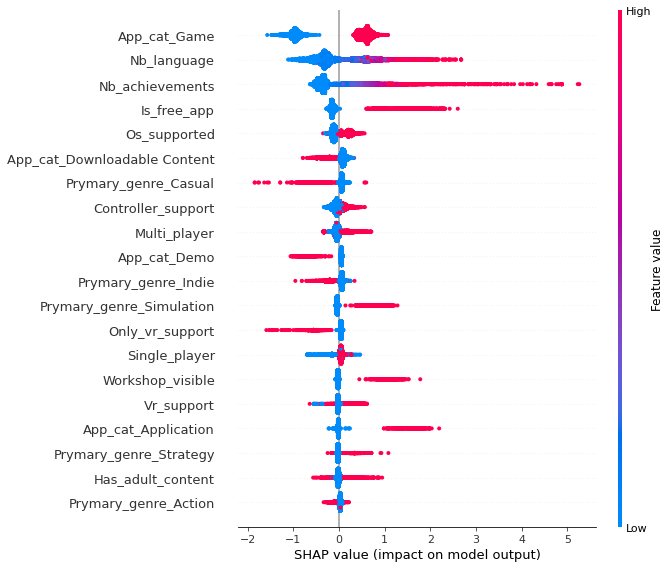

In [46]:
interpret_model(model)

# Auto-Ml Phase2

In [47]:
ds_f2_df = df_n_phase.drop(columns=['Steam_id', 'Title', 'Date_release', 'Evaluation', 'Nb_Eval',
                        'Price','Game_Tag_1', 'Game_Tag_2', 'Game_Tag_3', 'Game_Tag_4','Game_Tag_5',
                        'Dev_team', 'Publisher_team','Nb_game_tags','status_reco'])

In [48]:
exp_clf = setup(ds_f2_df, target = 'Value_reco', silent=True, session_id=69,
                numeric_features=['Os_supported','Controller_support', 'Is_free_app', 'Nb_language',
                                   'Workshop_visible', 'Only_vr_support', 'Vr_support',
                                   'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
                                   'Multi_player', 'Early_Access',])

 
Setup Succesfully Completed!


In [49]:
compare_models(blacklist=['xgboost'])

In [50]:
model_f2 = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6263  0.0  0.3677  0.5764  0.5950  0.0889
1       0.6294  0.0  0.3692  0.5786  0.5971  0.0931
2       0.6228  0.0  0.3725  0.5776  0.5948  0.0918
3       0.6395  0.0  0.3946  0.5980  0.6126  0.1319
4       0.6511  0.0  0.3861  0.6026  0.6196  0.1477
5       0.6157  0.0  0.3621  0.5669  0.5853  0.0728
6       0.6339  0.0  0.3771  0.5866  0.6034  0.1095
7       0.6339  0.0  0.3738  0.5823  0.5993  0.0993
8       0.6400  0.0  0.3641  0.5821  0.6025  0.1072
9       0.6378  0.0  0.3837  0.5931  0.6095  0.1259
Mean    0.6330  0.0  0.3751  0.5844  0.6019  0.1068
SD      0.0095  0.0  0.0098  0.0103  0.0094  0.0215

In [51]:
## Feature Importance plot not available for estimators that doesnt support coef_ or feature_importances_ attribute.
#plot_model(model_f2, plot='feature')

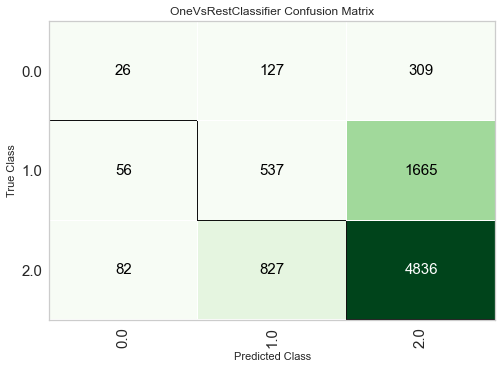

In [52]:
plot_model(model_f2, plot = 'confusion_matrix')

In [53]:
## SystemExit: (Type Error) optimize_threshold() cannot be used when target is multi-class. 
# optimize_threshold(model_f2, true_negative = 2000, false_negative = -5000)

- Test avec seulement 2 classes, en combinant les bad et mixed reviuew pour re equilibrer les classes

In [54]:
def apply_value_reco_2(df):
    if 'Positive' in df['Evaluation']:
        return 1
    else:
        return 0  

In [55]:
ds_f2_df_v2 = ds_f2_df

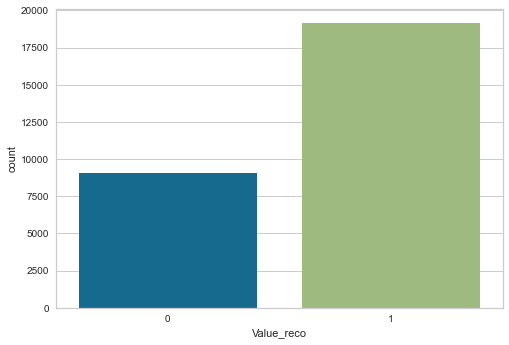

In [56]:
ds_f2_df_v2['Value_reco'] = df.apply(apply_value_reco_2, axis=1)
sns.countplot(ds_f2_df_v2['Value_reco'])

In [57]:
exp_clf = setup(ds_f2_df_v2, target = 'Value_reco', silent=True, session_id=69,
                numeric_features=['Os_supported','Controller_support', 'Is_free_app', 'Nb_language',
                                   'Workshop_visible', 'Only_vr_support', 'Vr_support',
                                   'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
                                   'Multi_player', 'Early_Access',])

 
Setup Succesfully Completed!


In [58]:
compare_models(blacklist=['xgboost'])

In [59]:
model_f2_v2 = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.6952  0.6800  0.9448  0.7058  0.8080  0.1381
1       0.6982  0.6752  0.9426  0.7089  0.8092  0.1519
2       0.6891  0.6544  0.9344  0.7043  0.8032  0.1280
3       0.6886  0.6611  0.9389  0.7026  0.8037  0.1208
4       0.6866  0.6522  0.9239  0.7054  0.8000  0.1325
5       0.6967  0.6839  0.9537  0.7041  0.8101  0.1345
6       0.6780  0.6673  0.9224  0.6991  0.7954  0.1028
7       0.6871  0.6714  0.9373  0.7017  0.8026  0.1185
8       0.7003  0.6890  0.9485  0.7085  0.8111  0.1538
9       0.6900  0.6708  0.9321  0.7056  0.8032  0.1343
Mean    0.6910  0.6705  0.9379  0.7046  0.8047  0.1315
SD      0.0063  0.0115  0.0096  0.0028  0.0047  0.0145

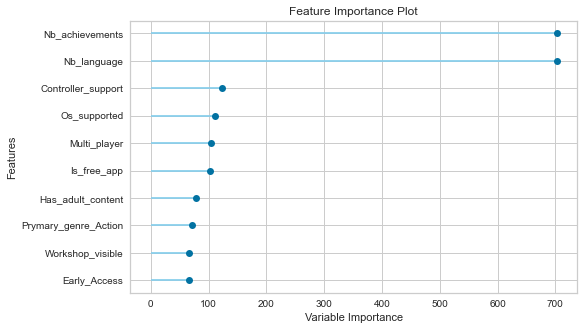

In [60]:
plot_model(model_f2_v2, plot='feature')

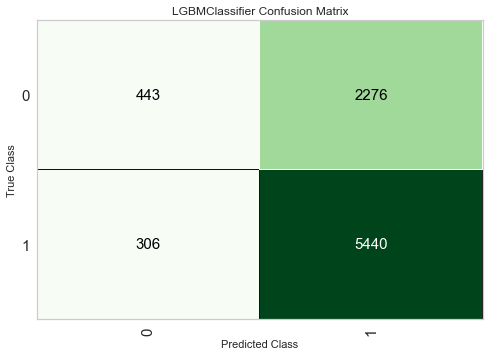

In [61]:
plot_model(model_f2_v2, plot='confusion_matrix')

In [62]:
 # plot_model(model_f2_v2, plot='learning') 

In [63]:
optimize_threshold(model_f2_v2, true_negative = 3000, false_negative = -5000)

Optimized Probability Threshold: 0.39 | Optimized Cost Function: 87000


# Auto-Ml Phase3

In [64]:
from pycaret.regression import *

In [65]:
ds_f3_df = df_n_phase.drop(columns=['Steam_id', 'Title', 'Date_release', 'Evaluation',
                        'Price','Game_Tag_1', 'Game_Tag_2', 'Game_Tag_3', 'Game_Tag_4','Game_Tag_5',
                        'Dev_team', 'Publisher_team','Nb_game_tags','status_reco','Value_reco'])

In [66]:
exp_reg101 = setup(ds_f3_df, target = 'Nb_Eval',remove_outliers=True, session_id=69,
                   numeric_features=['Os_supported','Controller_support', 'Is_free_app', 'Nb_language',
                                   'Workshop_visible', 'Only_vr_support', 'Vr_support',
                                   'Has_adult_content', 'Nb_achievements', 'Single_player', 'Coop_player',
                                   'Multi_player', 'Early_Access',]) 

 
Setup Succesfully Completed!


In [67]:
compare_models(blacklist=['xgboost'],sort='MAPE', round=2)

In [68]:
regre_model = create_model('svm')

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     1400.7105  1.406818e+08   11860.9368 -0.0122  1.7933  1.4060
1     4587.3450  1.170531e+10  108191.0785 -0.0017  1.8010  1.3960
2     2200.8063  1.124199e+09   33529.0697 -0.0041  1.7947  1.3752
3      952.3321  2.870590e+07    5357.7884 -0.0267  1.7316  1.3980
4     1625.0575  3.790858e+08   19470.1268 -0.0060  1.8242  1.4378
5     1280.1021  1.144295e+08   10697.1724 -0.0123  1.7461  1.4406
6      983.4126  6.168637e+07    7854.0670 -0.0128  1.6476  1.4608
7     1402.0536  1.089496e+08   10437.8934 -0.0156  1.8244  1.4461
8     1236.9083  2.281687e+08   15105.2543 -0.0059  1.6610  1.4255
9     1568.3405  3.403022e+08   18447.2819 -0.0063  1.7635  1.4920
Mean  1723.7069  1.423152e+09   24095.0669 -0.0104  1.7588  1.4278
SD    1012.2509  3.440719e+09   29027.2207  0.0069  0.0597  0.0331

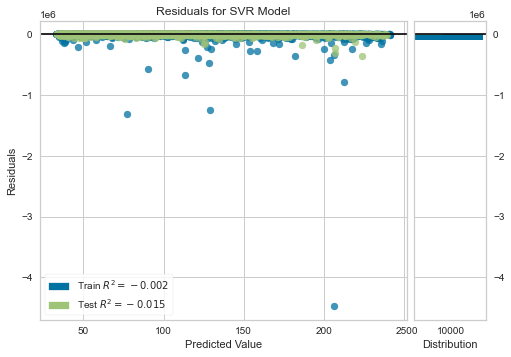

In [69]:
plot_model(regre_model)

In [70]:
## Feature Importance plot not available for estimators with coef_ attribute.
# plot_model(regre_model, plot='feature')

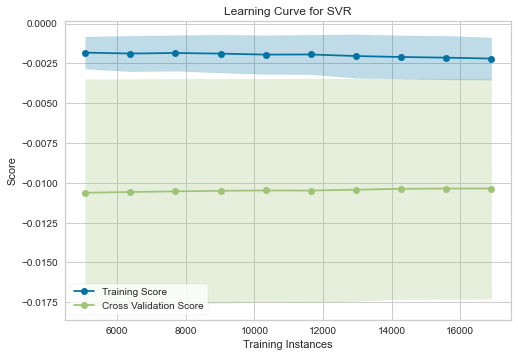

In [71]:
plot_model(regre_model, plot='learning')

In [72]:
# This function only supports tree based models.
# interpret_model(regre_model)

# Observation AutoMl

Premiere phase AutoMl sans trop toucher aux options, voici les 3 gagnants :

                        	
- phase 1 : CatBoost Classifier :
    - Accuracy = 0.75
    - Auc = 0.836
    - Recall = 0.722
    - Prec = 0.744
    - F1 = 0.733
    - Kappa = 0.498
		
        
- phase 2 : Light GradientBM	    					
    - Accuracy = 0.693
    - Auc = 0.671
    - Recall = 0.939
    - Prec = 0.705
    - F1 = 0.805
    - Kappa = 0.136


- phase 3 : Support Vector Machine	        	      	     
    - MAE = 1665.83	
    - MSE = 1417950917.62	
    - RMSE = 25740.26
    - R2 = -0.010
    - RMSLE = 1.75
    - MAPE = 1.42
    
sans suprise la classification multiple donne de moins bon resultat on conserve l'idée de mettre les revieuw négative et mixe ensemble.